### Additional views of example dynamics created by support states

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from aux import get_flow, run_fwd_np
from disp import set_plot, colors, quiver
from kernels import make_psi_rand_sgm, make_psi_rand_k_wta, make_psi_rand_tanh_k_wta

D = 2  # system dim
RX = np.linspace(-1.5, 1.5, 12)  # x array for making quiver/flow-field plots

In [2]:
# simulation params
t = np.arange(0, .1, .001)
us = np.zeros((len(t), D))
x_inits = np.array([[-1, -0.2], [1, -0.2], [-.2, 1.1], [.2, 1.1], [-.5, 1], [.5, 1], [-.5, -1], [.5, -1], [.2, .2]])  # initial positions

# base system params
TAU = .01
B = np.zeros((D, D))
f_0 = lambda x: np.zeros(D)
F_0 = lambda x, u: (1/TAU)*(-x + f_0(x) + B@u)
flow_0 = get_flow(F_0, RX)

xs_0 = [run_fwd_np(F_0, x_init, t) for x_init in x_inits]

# control directions
C = np.array([  
    [1., 0],
    [0., 1],
])  #L   U

In [3]:
def run_plot_smln(ker, x_stars, alphas, x_inits, arrow_scale=.3):
    df = lambda x: C@np.sum([alpha*ker(x_star, x) for alpha, x_star in zip(alphas, x_stars)], axis=0)
    F = lambda x, u: (1/TAU)*(-x + f_0(x) + df(x) + B@u)

    flow = get_flow(F, RX)

    xs = [run_fwd_np(F, x_init, t) for x_init in x_inits]

    fig, axs = plt.subplots(1, 3, figsize=(9, 3), tight_layout=True)
    quiver(axs[0], flow_0, RX)
    quiver(axs[1], flow, RX)
    quiver(axs[2], flow-flow_0, RX)

    for xs_0_ in xs_0:
        axs[0].plot(xs_0_[:, 0], xs_0_[:, 1], c='gray', lw=.75)
        axs[0].scatter(xs_0_[0, 0], xs_0_[0, 1], c='gray', s=20)

    for xs_ in xs:
        axs[1].plot(xs_[:, 0], xs_[:, 1], c='gray', lw=.75)
        axs[1].scatter(xs_[0, 0], xs_[0, 1], c='gray', s=20)

    for x_star, alpha in zip(x_stars, alphas):
        axs[2].scatter(*x_star, c='r', s=20)
        axs[2].arrow(*x_star, *alpha*arrow_scale, lw=.5, color='r')

    set_plot(axs[0], title='Base')
    set_plot(axs[1], title='Learned')
    set_plot(axs[2], title='Difference')
    
    for ax in axs:
        set_plot(ax, x_label=r'$x_1$', y_label=r'$x_2$')

    return fig, axs

# RAND-TANH-K-WTA kernel

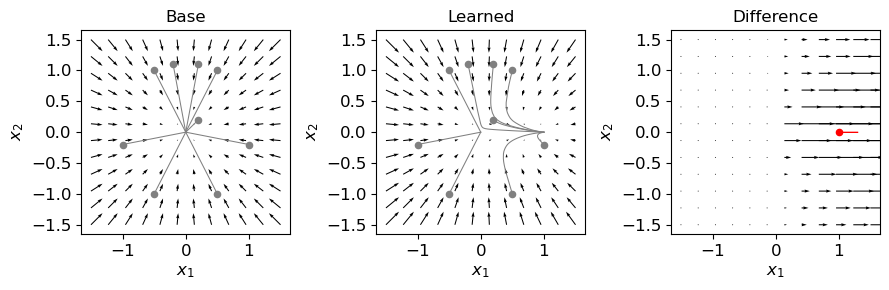

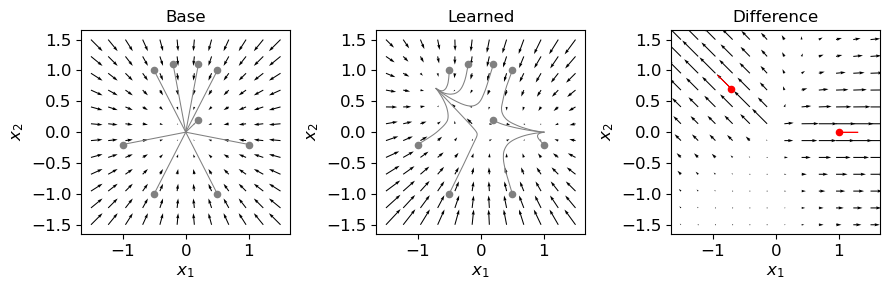

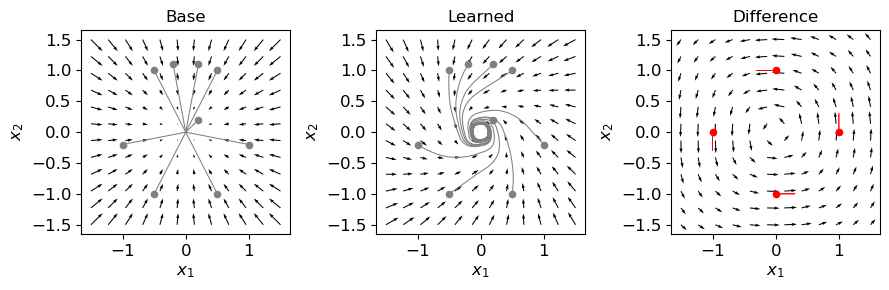

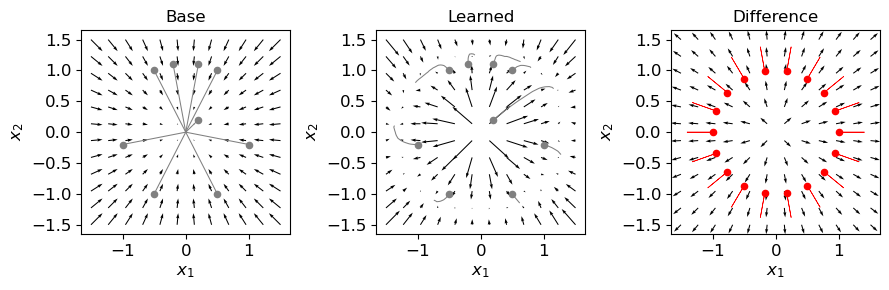

In [4]:
N = 2000
J_PSI = 5*np.random.randn(N, 2)
K = 100
_, ker = make_psi_rand_tanh_k_wta(J_PSI, K)

# single fixed point
x_stars = np.array([ [1., 0], ])
alphas =  np.array([ [1., 0], ])

fig, axs = run_plot_smln(ker, x_stars, alphas, x_inits)

# two fixed points
x_stars = np.array([ [1., 0], [-1/np.sqrt(2), 1/np.sqrt(2)]])
alphas =  np.array([ [1., 0], [-1/np.sqrt(2), 1/np.sqrt(2)]])

fig, axs = run_plot_smln(ker, x_stars, alphas, x_inits)

# limit cycle
x_stars = np.array([ [1., 0], [0, 1],  [-1, 0], [0, -1]])
alphas =  np.array([ [0., 1], [-1, 0], [0, -1], [1, 0]])*1

fig, axs = run_plot_smln(ker, x_stars, alphas, x_inits)

# approx ring attractor
thetas = np.linspace(0, 2*np.pi, 19)[:-1]
x_stars = np.array([np.cos(thetas), np.sin(thetas)]).T
alphas = np.array([np.cos(thetas), np.sin(thetas)]).T*.4

fig, axs = run_plot_smln(ker, x_stars, alphas, x_inits, arrow_scale=1)

# RAND-SIG kernel

(<Figure size 900x300 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Base'}, xlabel='$x_1$', ylabel='$x_2$'>,
        <AxesSubplot:title={'center':'Learned'}, xlabel='$x_1$', ylabel='$x_2$'>,
        <AxesSubplot:title={'center':'Difference'}, xlabel='$x_1$', ylabel='$x_2$'>],
       dtype=object))

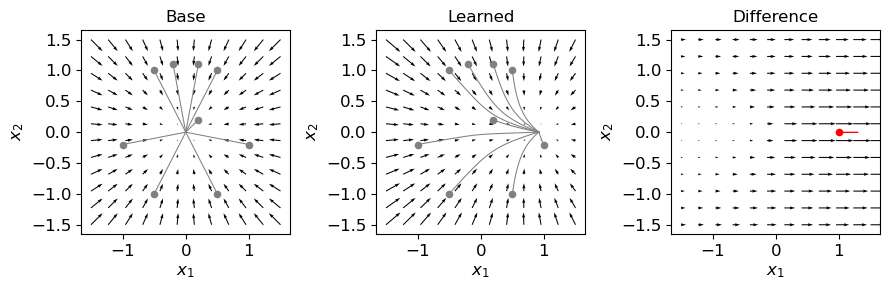

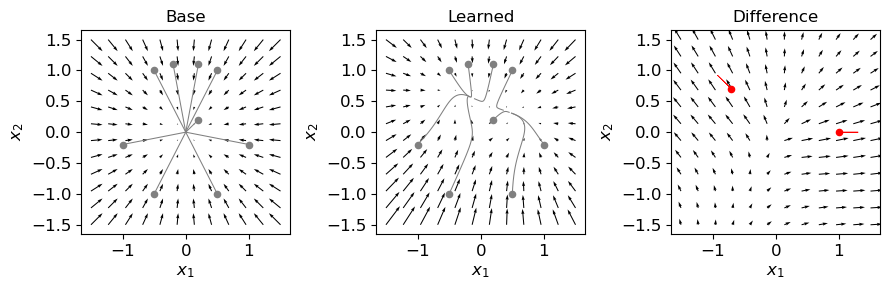

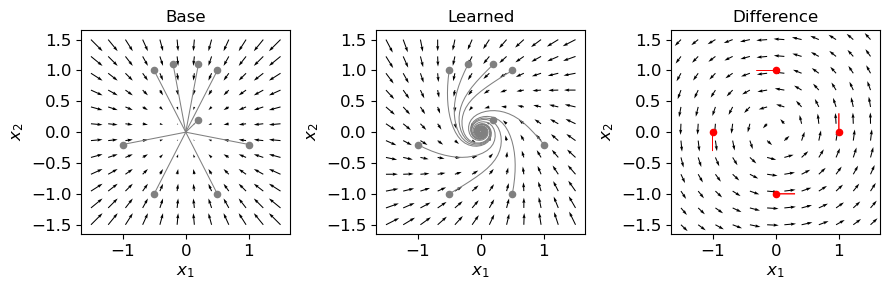

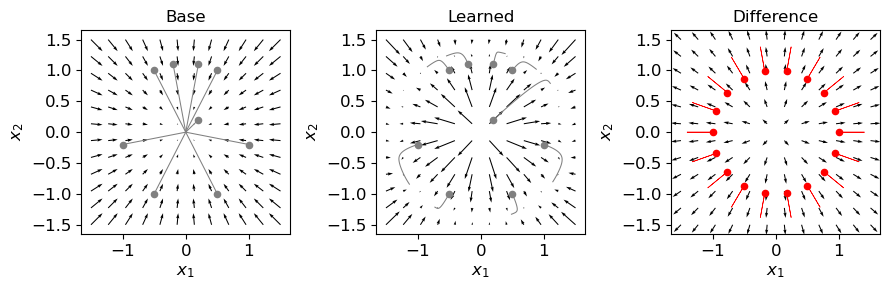

In [5]:
N = 2000
J_PSI = 5*np.random.randn(N, 2)
_, ker = make_psi_rand_sgm(J_PSI)

# single fixed point
x_stars = np.array([ [1., 0], ])
alphas =  np.array([ [1., 0], ])

run_plot_smln(ker, x_stars, alphas, x_inits)

# two fixed points
x_stars = np.array([ [1., 0], [-1/np.sqrt(2), 1/np.sqrt(2)]])
alphas =  np.array([ [1., 0], [-1/np.sqrt(2), 1/np.sqrt(2)]])

run_plot_smln(ker, x_stars, alphas, x_inits)

# limit cycle
x_stars = np.array([ [1., 0], [0, 1],  [-1, 0], [0, -1]])
alphas =  np.array([ [0., 1], [-1, 0], [0, -1], [1, 0]])*1

run_plot_smln(ker, x_stars, alphas, x_inits)

# approx ring attractor
thetas = np.linspace(0, 2*np.pi, 19)[:-1]
x_stars = np.array([np.cos(thetas), np.sin(thetas)]).T
alphas = np.array([np.cos(thetas), np.sin(thetas)]).T*.4

run_plot_smln(ker, x_stars, alphas, x_inits, arrow_scale=1)